# Note - This Is Interactive Data Analysis.***************************
# Download this file along with 'DATASETS' folder containing datasets.
# Run on Local Machine to have Best Interactive Experience

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly

In [1]:
%pip install --upgrade plotly
%pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('../DATASETS/nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning


In [6]:
df_data.shape # shape

(962, 16)

In [7]:
df_data.columns # column names

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
df_data.sort_values(["year"]).loc[0] # Year the Nobel prize first awarded

year                                                                  1901
category                                                         Chemistry
prize                                    The Nobel Prize in Chemistry 1901
motivation               "in recognition of the extraordinary services ...
prize_share                                                            1/1
laureate_type                                                   Individual
full_name                                     Jacobus Henricus van 't Hoff
birth_date                                                      1852-08-30
birth_city                                                       Rotterdam
birth_country                                                  Netherlands
birth_country_current                                          Netherlands
sex                                                                   Male
organization_name                                        Berlin University
organization_city        

In [9]:
df_data.sort_values(['year'], ascending=False).head(1) # latest year included in the dataset

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


### Check for Duplicates

In [10]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [11]:
df_data.isnull().values.any()

True

In [12]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [13]:
col_subset =['year','category','laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data["organization_name"].isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN


### Type Conversions


#### Convert Year and Birth Date to Datetime

In [14]:
type(df_data['year'][0])

numpy.int64

In [15]:
type(df_data['birth_date'][0])

str

In [16]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

In [17]:
print(type(df_data['year'][0]))
print(type(df_data['birth_date'][0]))

<class 'numpy.int64'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Adding a  Column with the Prize Share as a Percentage

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [19]:
separated_value = df_data['prize_share'].str.split('/', expand=True)
numerator = pd.to_numeric(separated_value[0])
denominator = pd.to_numeric(separated_value[1])
df_data['share_pct']= numerator / denominator*100
df_data.sample(5)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
42,1907,Physics,The Nobel Prize in Physics 1907,"""for his optical precision instruments and the...",1/1,Individual,Albert Abraham Michelson,1852-12-19,Strelno (Strzelno),Prussia (Poland),Poland,Male,University of Chicago,"Chicago, IL",United States of America,POL,100.00
574,1987,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his contributions to the theory of econom...",1/1,Individual,Robert M. Solow,1924-08-23,"Brooklyn, NY",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00
698,1998,Physics,The Nobel Prize in Physics 1998,"""for their discovery of a new form of quantum ...",1/3,Individual,Robert B. Laughlin,1950-11-01,"Visalia, CA",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,33.33
667,1996,Literature,The Nobel Prize in Literature 1996,"""for poetry that with ironic precision allows ...",1/1,Individual,Wislawa Szymborska,1923-07-02,Bnin (Kórnik),Poland,Poland,Female,NaN,NaN,NaN,POL,100.00
48,1908,Peace,The Nobel Peace Prize 1908,NaN,1/2,Individual,Klas Pontus Arnoldson,1844-10-27,Gothenburg,Sweden,Sweden,Male,NaN,NaN,NaN,SWE,50.00


In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [21]:
biology =df_data.sex.value_counts()
biology

Male      876
Female     58
Name: sex, dtype: int64

In [22]:
fig = px.pie(labels= biology.index,
             values= biology.values,
      hole=0.4,
      title="Percentage of Male vs. Female Winners",
      names=biology.index)
fig.update_traces(textposition='outside', textfont_size=14, textinfo='label+percent')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?


In [23]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00


In [24]:
df_data[df_data['sex']=='Female'].sort_values('year')[:3] # first 3 female Nobel laureates

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


# Finding Repeat Winners
 

In [25]:
is_winner = df_data.duplicated('full_name', keep=False)
is_winner.value_counts()

False    949
True      13
dtype: int64

In [26]:
multiple_winner = df_data[is_winner]
multiple_winner

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,100.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,100.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,33.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,100.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,100.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00


In [27]:
f'There are {multiple_winner.full_name.nunique()} people with Double+ Victory in Nobel Prize Arena'




'There are 6 people with Double+ Victory in Nobel Prize Arena'

In [28]:
col_subset =['year', 'category', 'laureate_type', 'full_name']
multiple_winner[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category


In [29]:
category_num=df_data['category'].value_counts()

In [30]:
fig= px.bar(category_num,
      x=category_num.index,
      y=category_num.values,
      color=category_num.values,
      color_continuous_scale='Aggrnyl'
     )
fig.update_layout(xaxis_title='Category', yaxis_title= 'Number of Nobel Prizes',coloraxis_showscale=False)
fig.show()

# the most number of prizes awarded - MEDICINE
# the fewest number of prizes awarded - ECONOMICS

In [31]:
df_data[df_data['category']=='Economics'].sort_values('year')[:1]

# the first prize in the field of Economics awarded

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00


# Male and Female Winners by Category

In [32]:
category_num_wih_sex =df_data.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})
category_num_sex_women = category_num_wih_sex.sort_values('prize',ascending=False)
category_num_sex_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [33]:
fig= px.bar(category_num_sex_women,
      x=category_num_sex_women.category,
      y=category_num_sex_women.prize,
      color= category_num_sex_women.sex)
fig.update_layout(xaxis_title='Category', yaxis_title='Number of Nobel Prize')
fig.show()

# Men Won Majority Number of Awards

# Number of Prizes Awarded Over Time


In [34]:
prizes_over_time= df_data.groupby(by='year').count().prize
prizes_over_time # the number of prizes awarded every year.

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

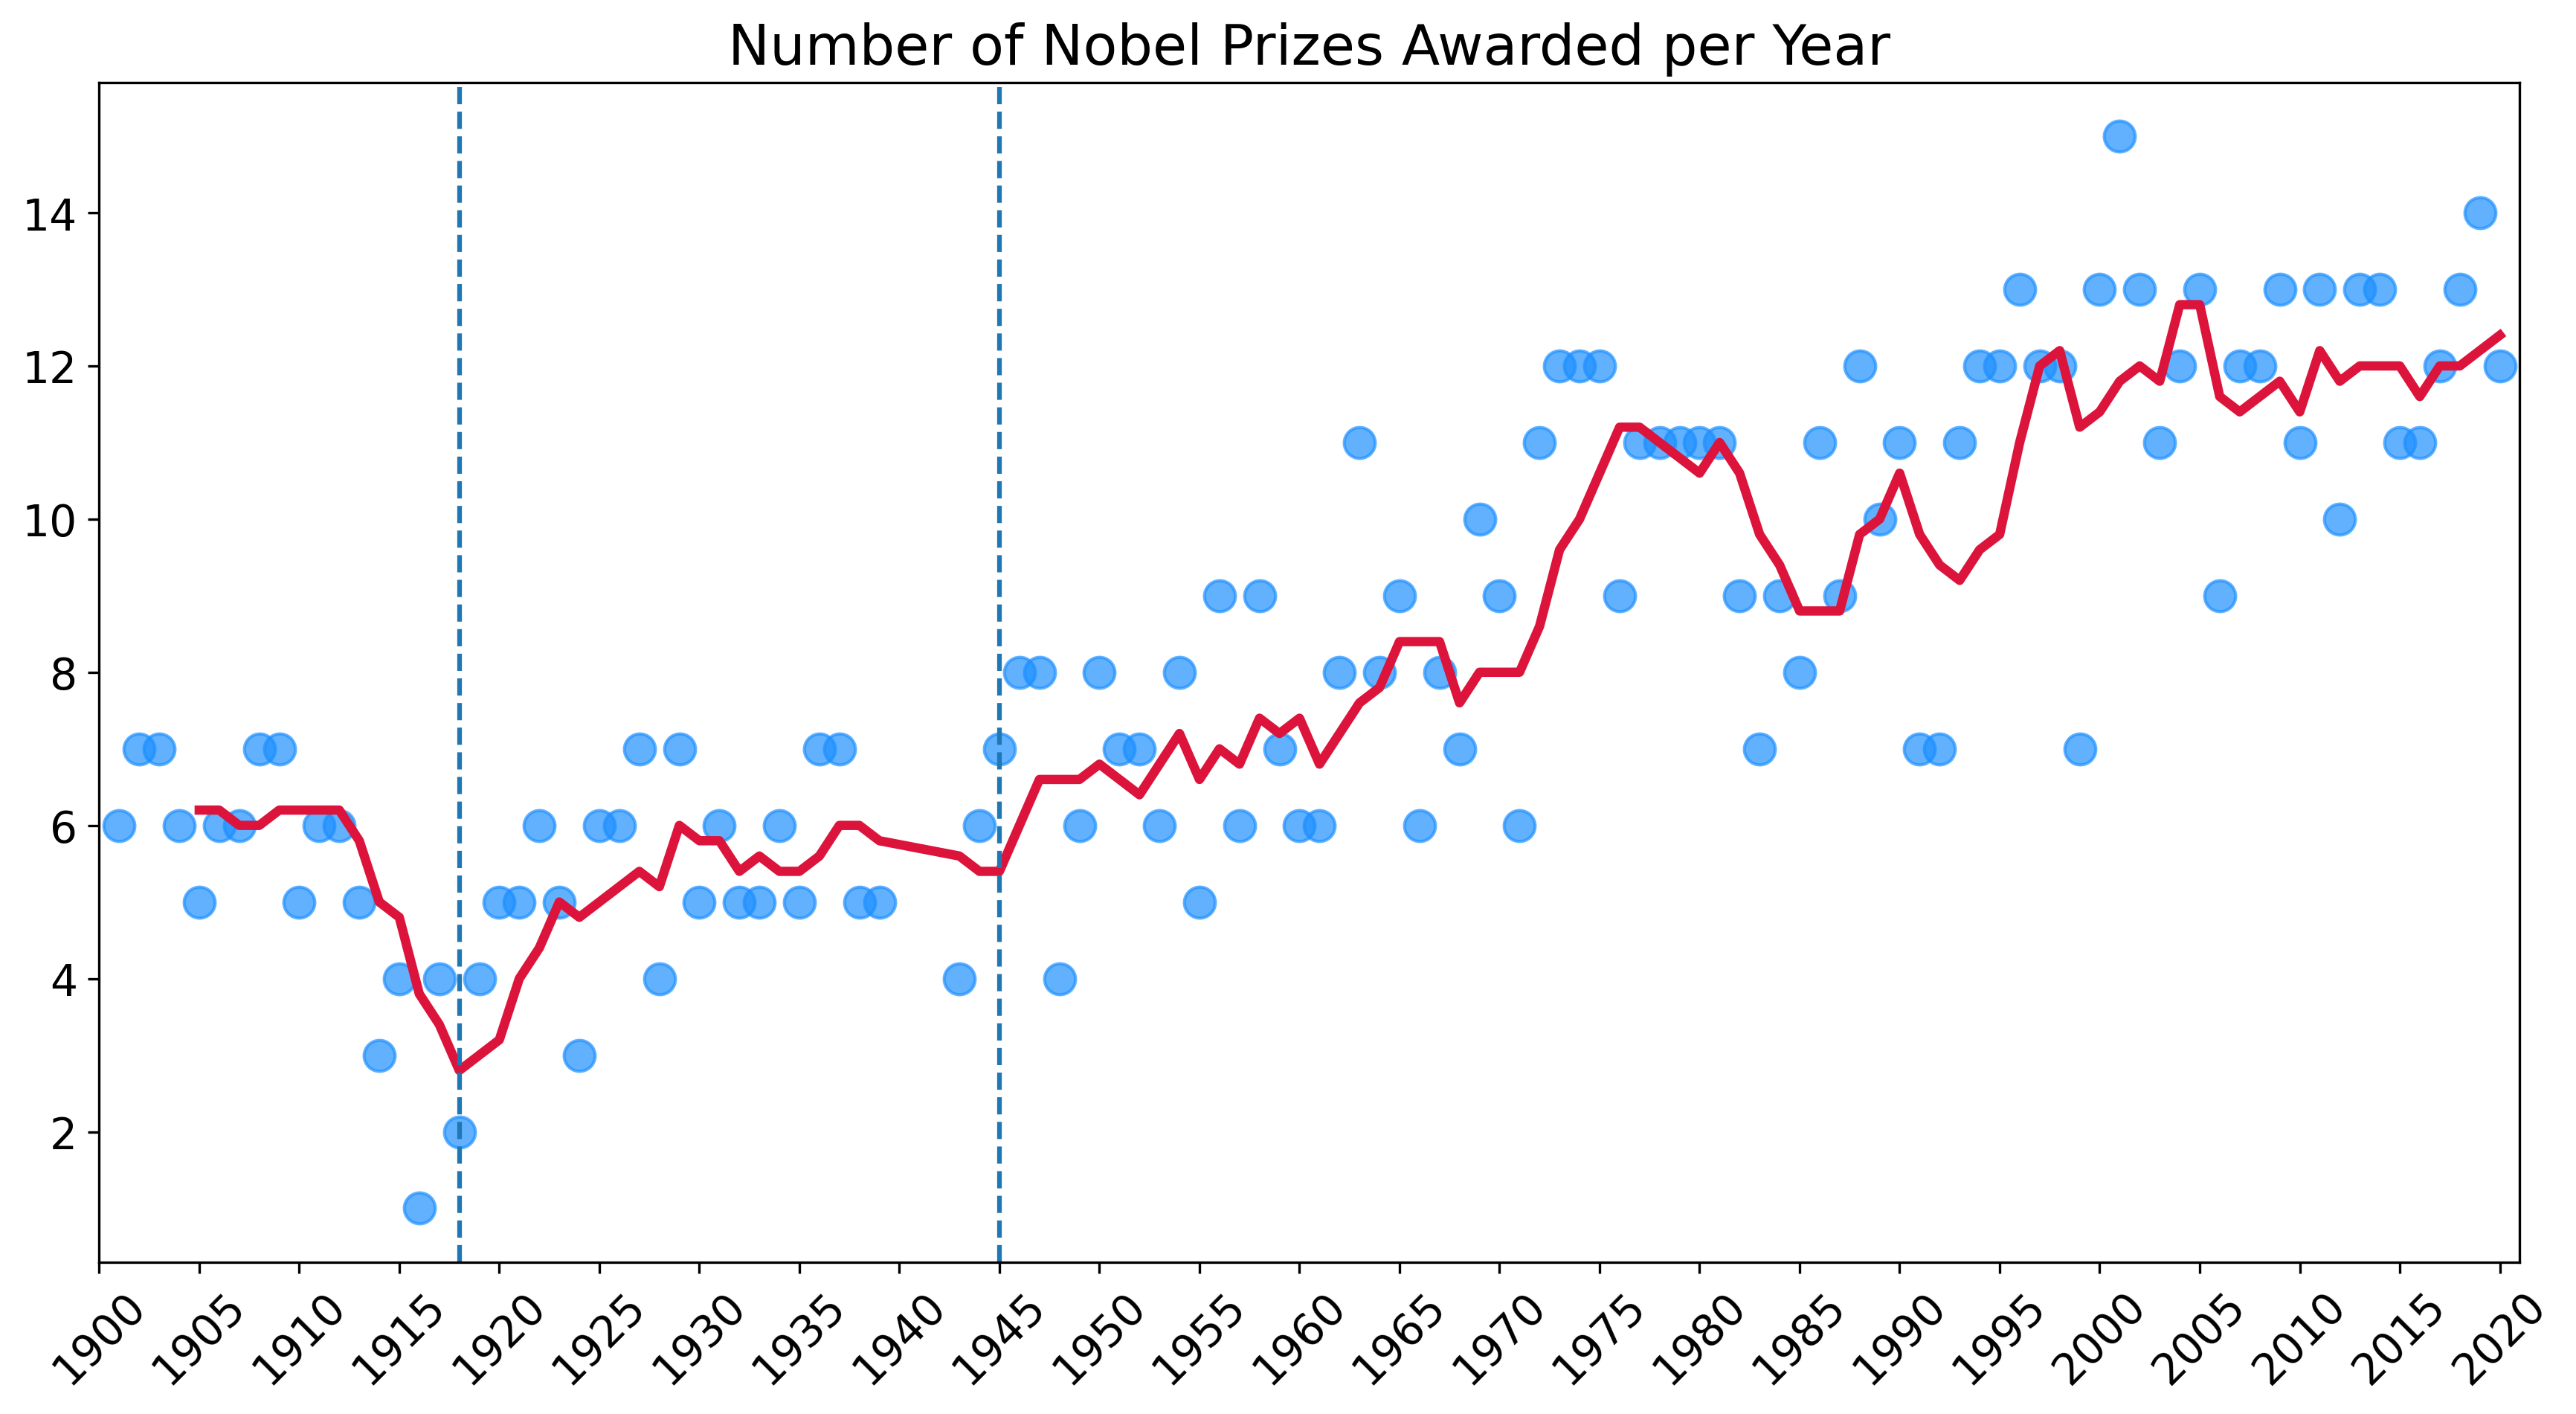

In [35]:
moving_average = prizes_over_time.rolling(window=5).mean() #5 year rolling average of the number of prizes
plt.figure(figsize=(14,7), dpi=300)
plt.title('Number of Nobel Prizes Awarded per Year',fontsize=18)
plt.yticks(fontsize=14)

plt.xticks(ticks=np.arange(1900,2021, step=5),fontsize=14,rotation=45)
ax=plt.gca()
ax.scatter(x= prizes_over_time.index,
           y=prizes_over_time.values,
           c='dodgerblue',
           alpha=0.7,
            s=100
        )
ax.set_xlim(1900,2021)
ax.plot(prizes_over_time.index,
         moving_average.values,
         c='crimson',
         linewidth=3,
     )

plt.axvline(1918,ls='--') # World War 1
plt.axvline(1945,ls='--') # World War 2

plt.show()

# Result is Continously UpTrend while World War 1(1914-1918) & 2(1939-1945) had small drops in Prizes

# Are More Prizes Shared Than Before?

In [36]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00


In [37]:
df_data.describe()

,year,share_pct
count,962.00,962.00
mean,"1,971.82",62.68
std,33.81,29.39
min,"1,901.00",25.00
25%,"1,948.00",33.33
50%,"1,977.00",50.00
75%,"2,001.00",100.00
max,"2,020.00",100.00


In [38]:
share_over_time=df_data.groupby(['year']).agg({'share_pct': pd.Series.mean})
share_over_time_rolled = share_over_time.rolling(window=5).mean()

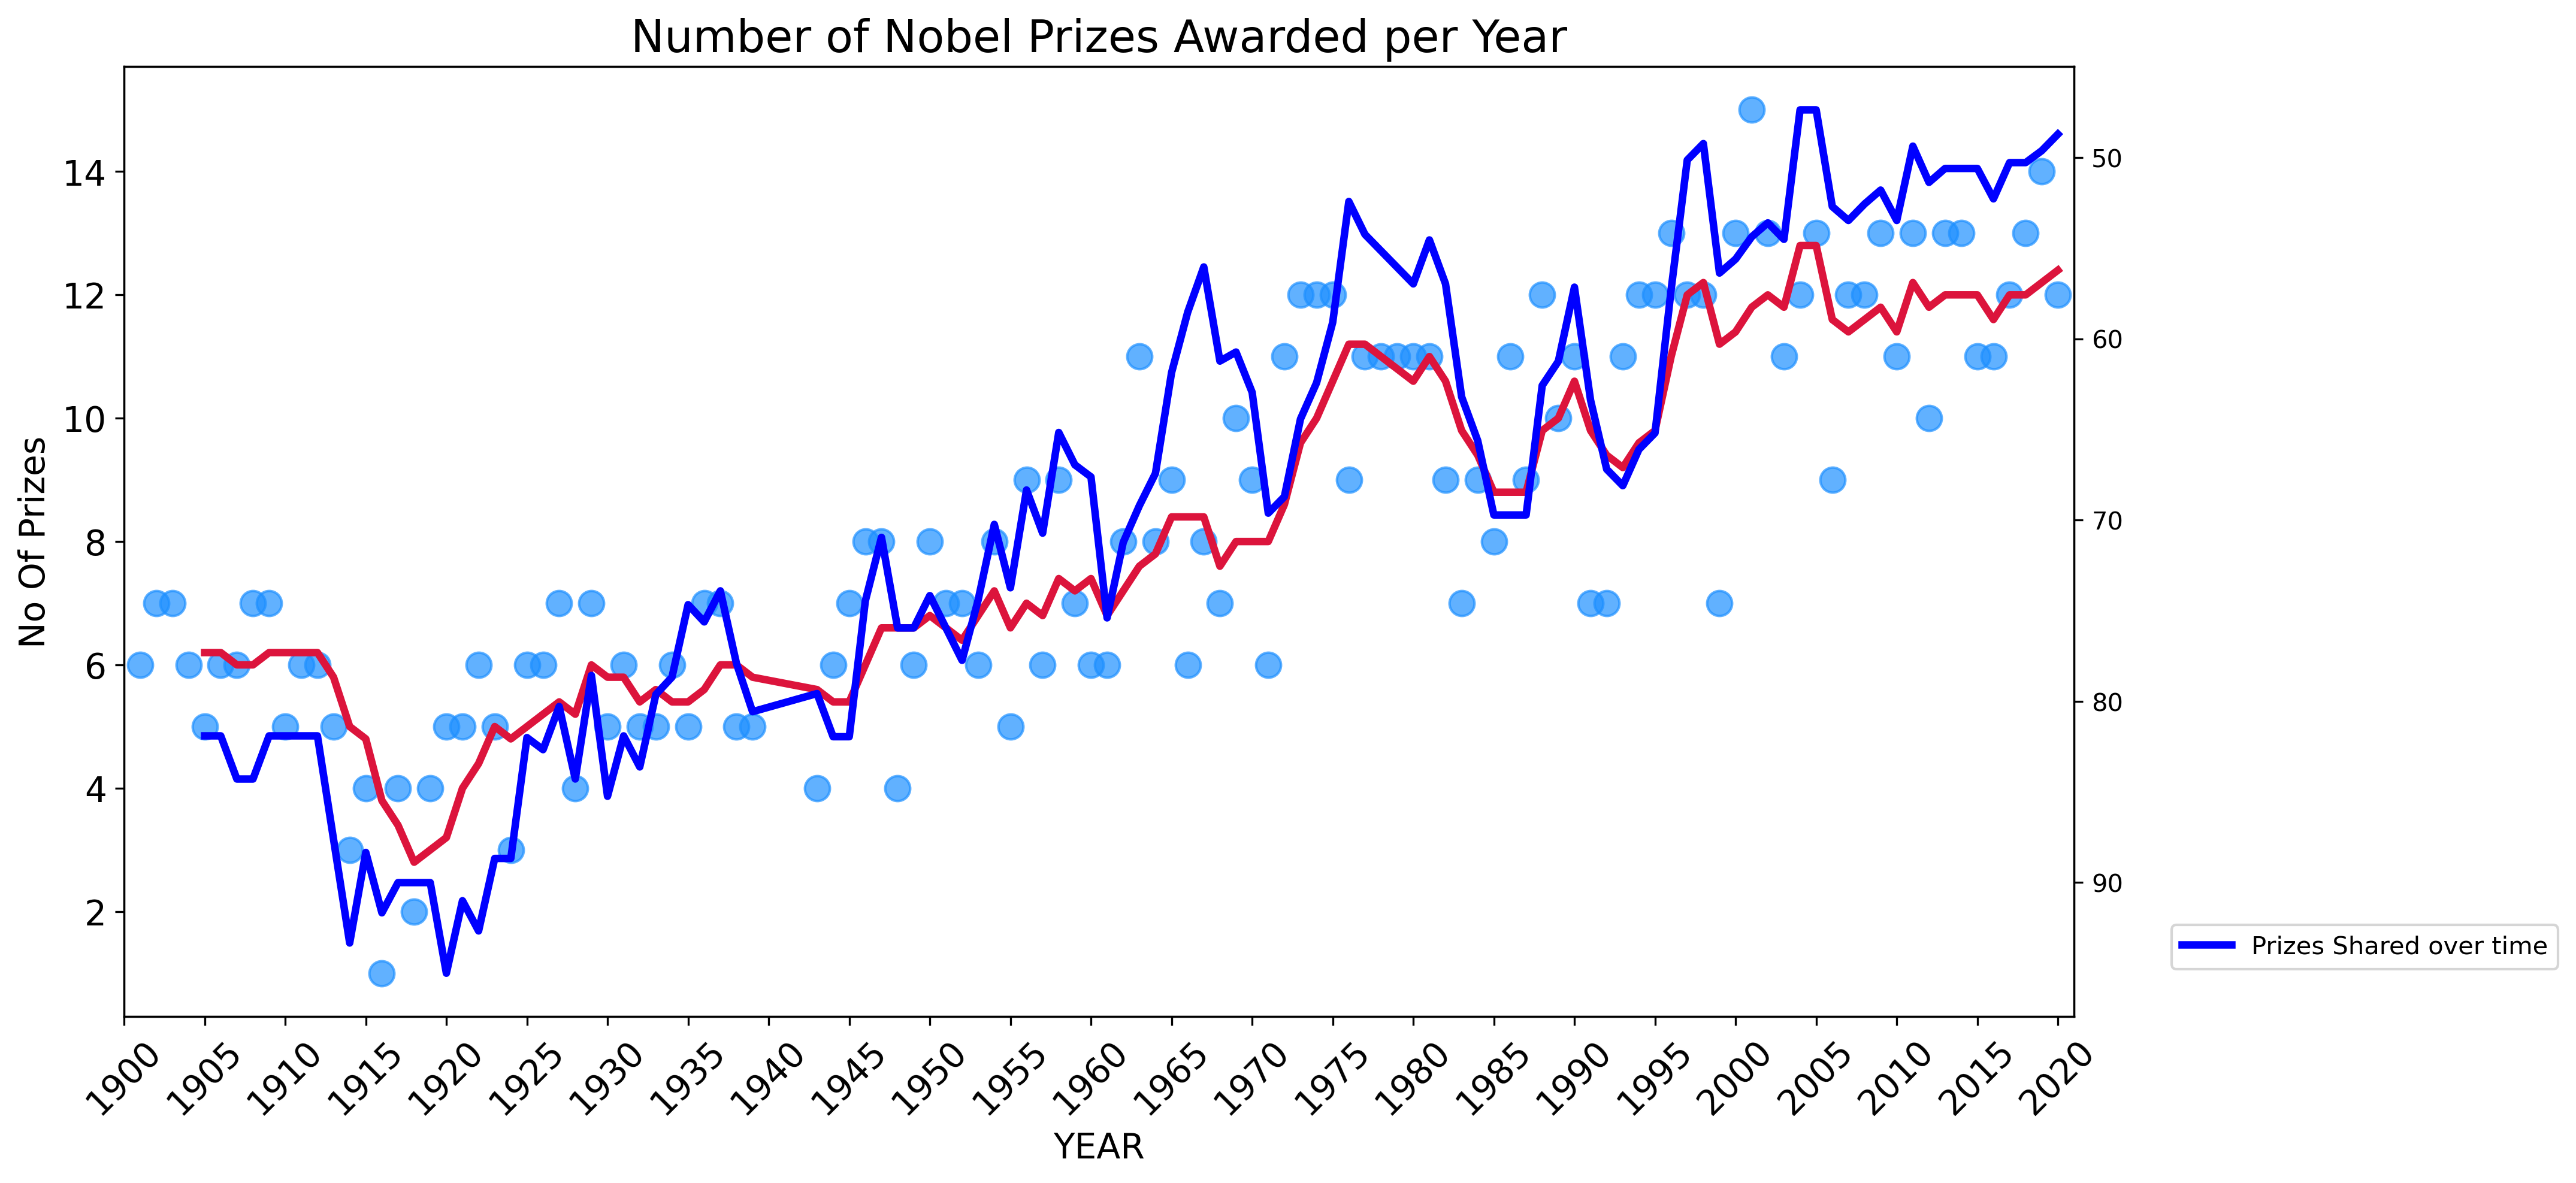

In [39]:
moving_average = prizes_over_time.rolling(window=5).mean()
plt.figure(figsize=(14,7), dpi=300)
plt.title('Number of Nobel Prizes Awarded per Year',fontsize=18)
plt.yticks(fontsize=14)

plt.xticks(ticks=np.arange(1900,2021, step=5),fontsize=14,rotation=45)
ax1=plt.gca()
ax2=ax1.twinx()
ax1.scatter(x= prizes_over_time.index,
           y=prizes_over_time.values,
           c='dodgerblue',
           alpha=0.7,
            s=100
        )
ax1.set_xlim(1900,2021)
ax1.plot(prizes_over_time.index,
         moving_average.values,
         c='crimson',
         linewidth=3,
         label='Prizes Over Time'
 
     )
ax2.invert_yaxis()
ax2.plot(share_over_time_rolled.index,
         share_over_time_rolled.share_pct,
         c="blue",
         linewidth=3,
         label='Prizes Shared over time'
         
        )
plt.legend(loc=(1.05,0.05))
ax1.set_xlabel('YEAR',fontsize=14)
ax1.set_ylabel('No Of Prizes',fontsize=14)
plt.show()

####  Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.



# The Countries with the Most Nobel Prizes

In [40]:
df_data.head(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00


In [41]:
top20_countries = df_data.groupby(['birth_country_current'],as_index=False).agg({'prize': pd.Series.count})
top20_countries.sort_values('prize',inplace=True)
top20_countries= top20_countries[-20:]
top20_countries


,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [42]:
h_bar = px.bar(
       x=top20_countries.prize,
       y=top20_countries.birth_country_current,
       orientation='h',
       title='Top 20 Countries by Number of Prizes',
       color= top20_countries.prize,
       color_continuous_scale='Viridis'
      )
h_bar.update_layout(xaxis_title='Number of Nobel Prizes', yaxis_title= 'Country',coloraxis_showscale=False)
h_bar.show()

# Choropleth Map to Show the Number of Prizes Won by Country


In [43]:
world_map=df_data.groupby(['birth_country_current','ISO'],as_index=False).agg({'prize': pd.Series.count})
world_map

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [44]:
map= px.choropleth(world_map,
                   locations='ISO',
                   color='prize',
                   hover_name='birth_country_current',
                   color_continuous_scale=px.colors.sequential.matter
                  )
map.update_layout(coloraxis_showscale=True)
map.show()

# The category breakdown by country

In [45]:
df_data.head(1)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00


In [46]:
one_prize =df_data.groupby(['birth_country_current', 'category'],as_index=False).agg({'prize':pd.Series.count})
one_prize.sort_values('prize', ascending=False, inplace=True)
one_prize

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [47]:
merged_df = pd.merge(one_prize, top20_countries, on='birth_country_current')
merged_df.columns= ['birth_country_current','category','cat_prize', 'total_prize']
merged_df.sort_values('total_prize',inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [48]:
cat_bar= px.bar(x=merged_df.cat_prize,
       y=merged_df.birth_country_current,
       color= merged_df.category,
       orientation='h',
       title='Top 20 Countries by Number of Prizes and Category')
 
cat_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_bar.show()  

### Number of Prizes Won by Each Country Over Time


In [49]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00


In [50]:
prize_by_year =df_data.groupby(['year','birth_country_current' ],as_index=False).agg({'prize': pd.Series.count})
prize_by_year.sort_values(['birth_country_current','year'])

,year,birth_country_current,prize
234,1957,Algeria,1
469,1997,Algeria,1
149,1936,Argentina,1
186,1947,Argentina,1
366,1980,Argentina,1
...,...,...,...
626,2020,United States of America,7
371,1980,Venezuela,1
324,1973,Vietnam,1
563,2011,Yemen,1


In [51]:

cumulative_prizes = prize_by_year.groupby(['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [52]:
plt.figure(figsize=(14,7),dpi=300)
l_chart=px.line(cumulative_prizes,
         x='year',
         y='prize',
        color='birth_country_current',
        hover_name='birth_country_current')
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

<Figure size 4200x2100 with 0 Axes>

# What are the Top Research Organisations?


In [53]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00


In [54]:
win_by_org=df_data.groupby(['organization_name'],as_index=False).agg({'prize':pd.Series.count})
win_by_org=win_by_org.sort_values('prize')[-20:]
win_by_org

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [55]:
win_org=px.bar(win_by_org,
       y='organization_name',
       x='prize',
       orientation='h',
       color='prize',
       color_continuous_scale=px.colors.sequential.haline,
       title='Top 20 Research Institutions by Number of Prizes'
      )
win_org.update_layout(xaxis_title='Prize', yaxis_title='Organization')

win_org.show()

# Which Cities Make the Most Discoveries? 


In [56]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00


In [57]:
win_by_city=df_data.groupby(['organization_city'],as_index=False).agg({'prize':pd.Series.count})
win_by_city=win_by_city.sort_values('prize',ascending=True)[-20:]
win_by_city.columns=['City', 'Prize']
win_by_city

,City,Prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


In [58]:
city_prize= px.bar(win_by_city,
       y='City',
       x='Prize',
       color='Prize',
        orientation='h',
       title='Top 20 Cities by Number of Prizes'
    
      )
city_prize.update_layout(xaxis_title='Prizes', yaxis_title='City')
city_prize.show()

# Where are Nobel Laureates Born?


In [59]:
win_by_birth_city=df_data.groupby(['birth_city'],as_index=False).agg({'prize':pd.Series.count})
win_by_birth_city=win_by_birth_city.sort_values('prize',ascending=True)[-20:]
# win_by_birth_city.columns=['City', 'Prize']
win_by_birth_city

,birth_city,prize
343,"Milwaukee, WI",3
87,Cairo,4
356,Montreal,4
428,"Pittsburgh, PA",4
167,Frankfurt-on-the-Main,5
440,Prague,5
515,Stockholm,6
210,Hamburg,6
363,Munich,7
358,Moscow,7


In [60]:
birth_city_prize= px.bar(win_by_birth_city,
       y='birth_city',
       x='prize',
       color='prize',
        orientation='h',
       title='Top 20 Cities by Number of Prizes',
#        color_continuous_scale= px.colors.sequential.plasma
    
      )
birth_city_prize.update_layout(xaxis_title='Prizes', yaxis_title='City')
birth_city_prize.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation




In [61]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [62]:
# plt.figure(figsize=(105,7))
burst = px.sunburst(country_city_org,
            path=['organization_country','organization_city','organization_name'],
            values='prize',
            title='Where do Discoveries Take Place?'
           )
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
burst.show()

# Patterns in the Laureate Age at the Time of the Award


In [63]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00


In [64]:
birth_year = df_data.birth_date.dt.year

In [65]:
df_data['winning_age']= df_data.year - birth_year
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00,49.00


### Who were the oldest and youngest winners?


In [66]:
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


In [67]:
display(df_data.nlargest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


In [68]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award


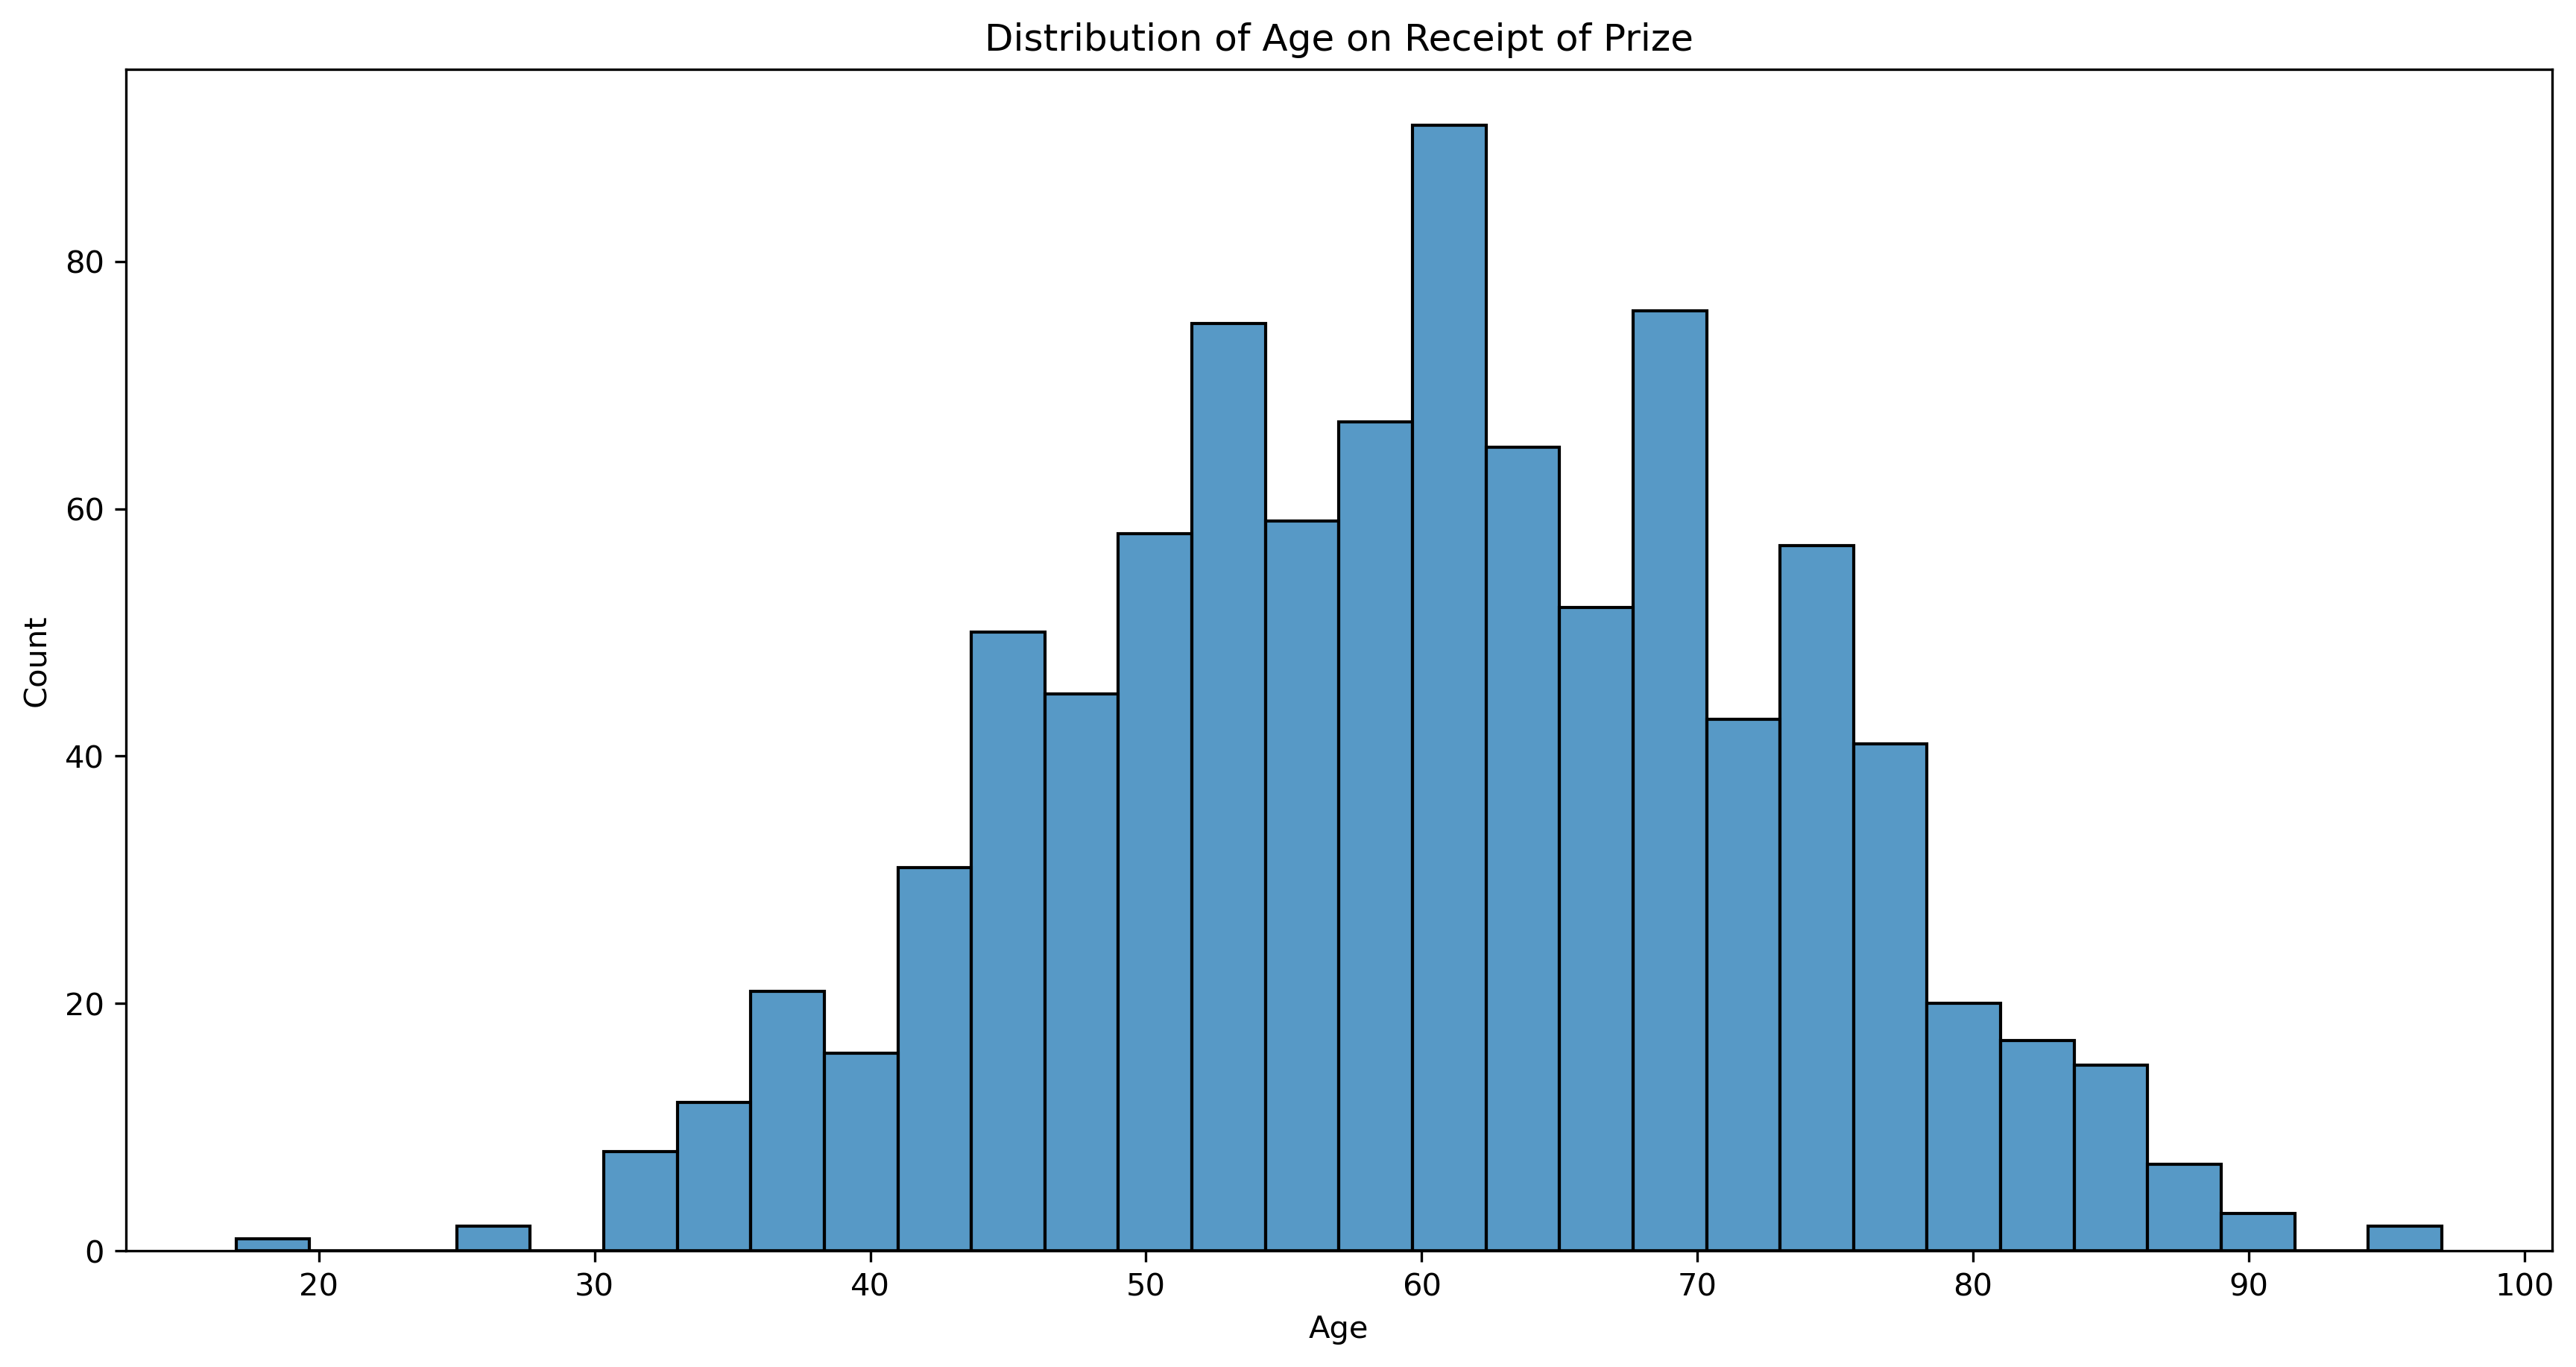

In [69]:
plt.figure(figsize=(14,7),dpi =300)
sns.histplot(df_data,
             x=df_data.winning_age,
             bins=30            )
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History


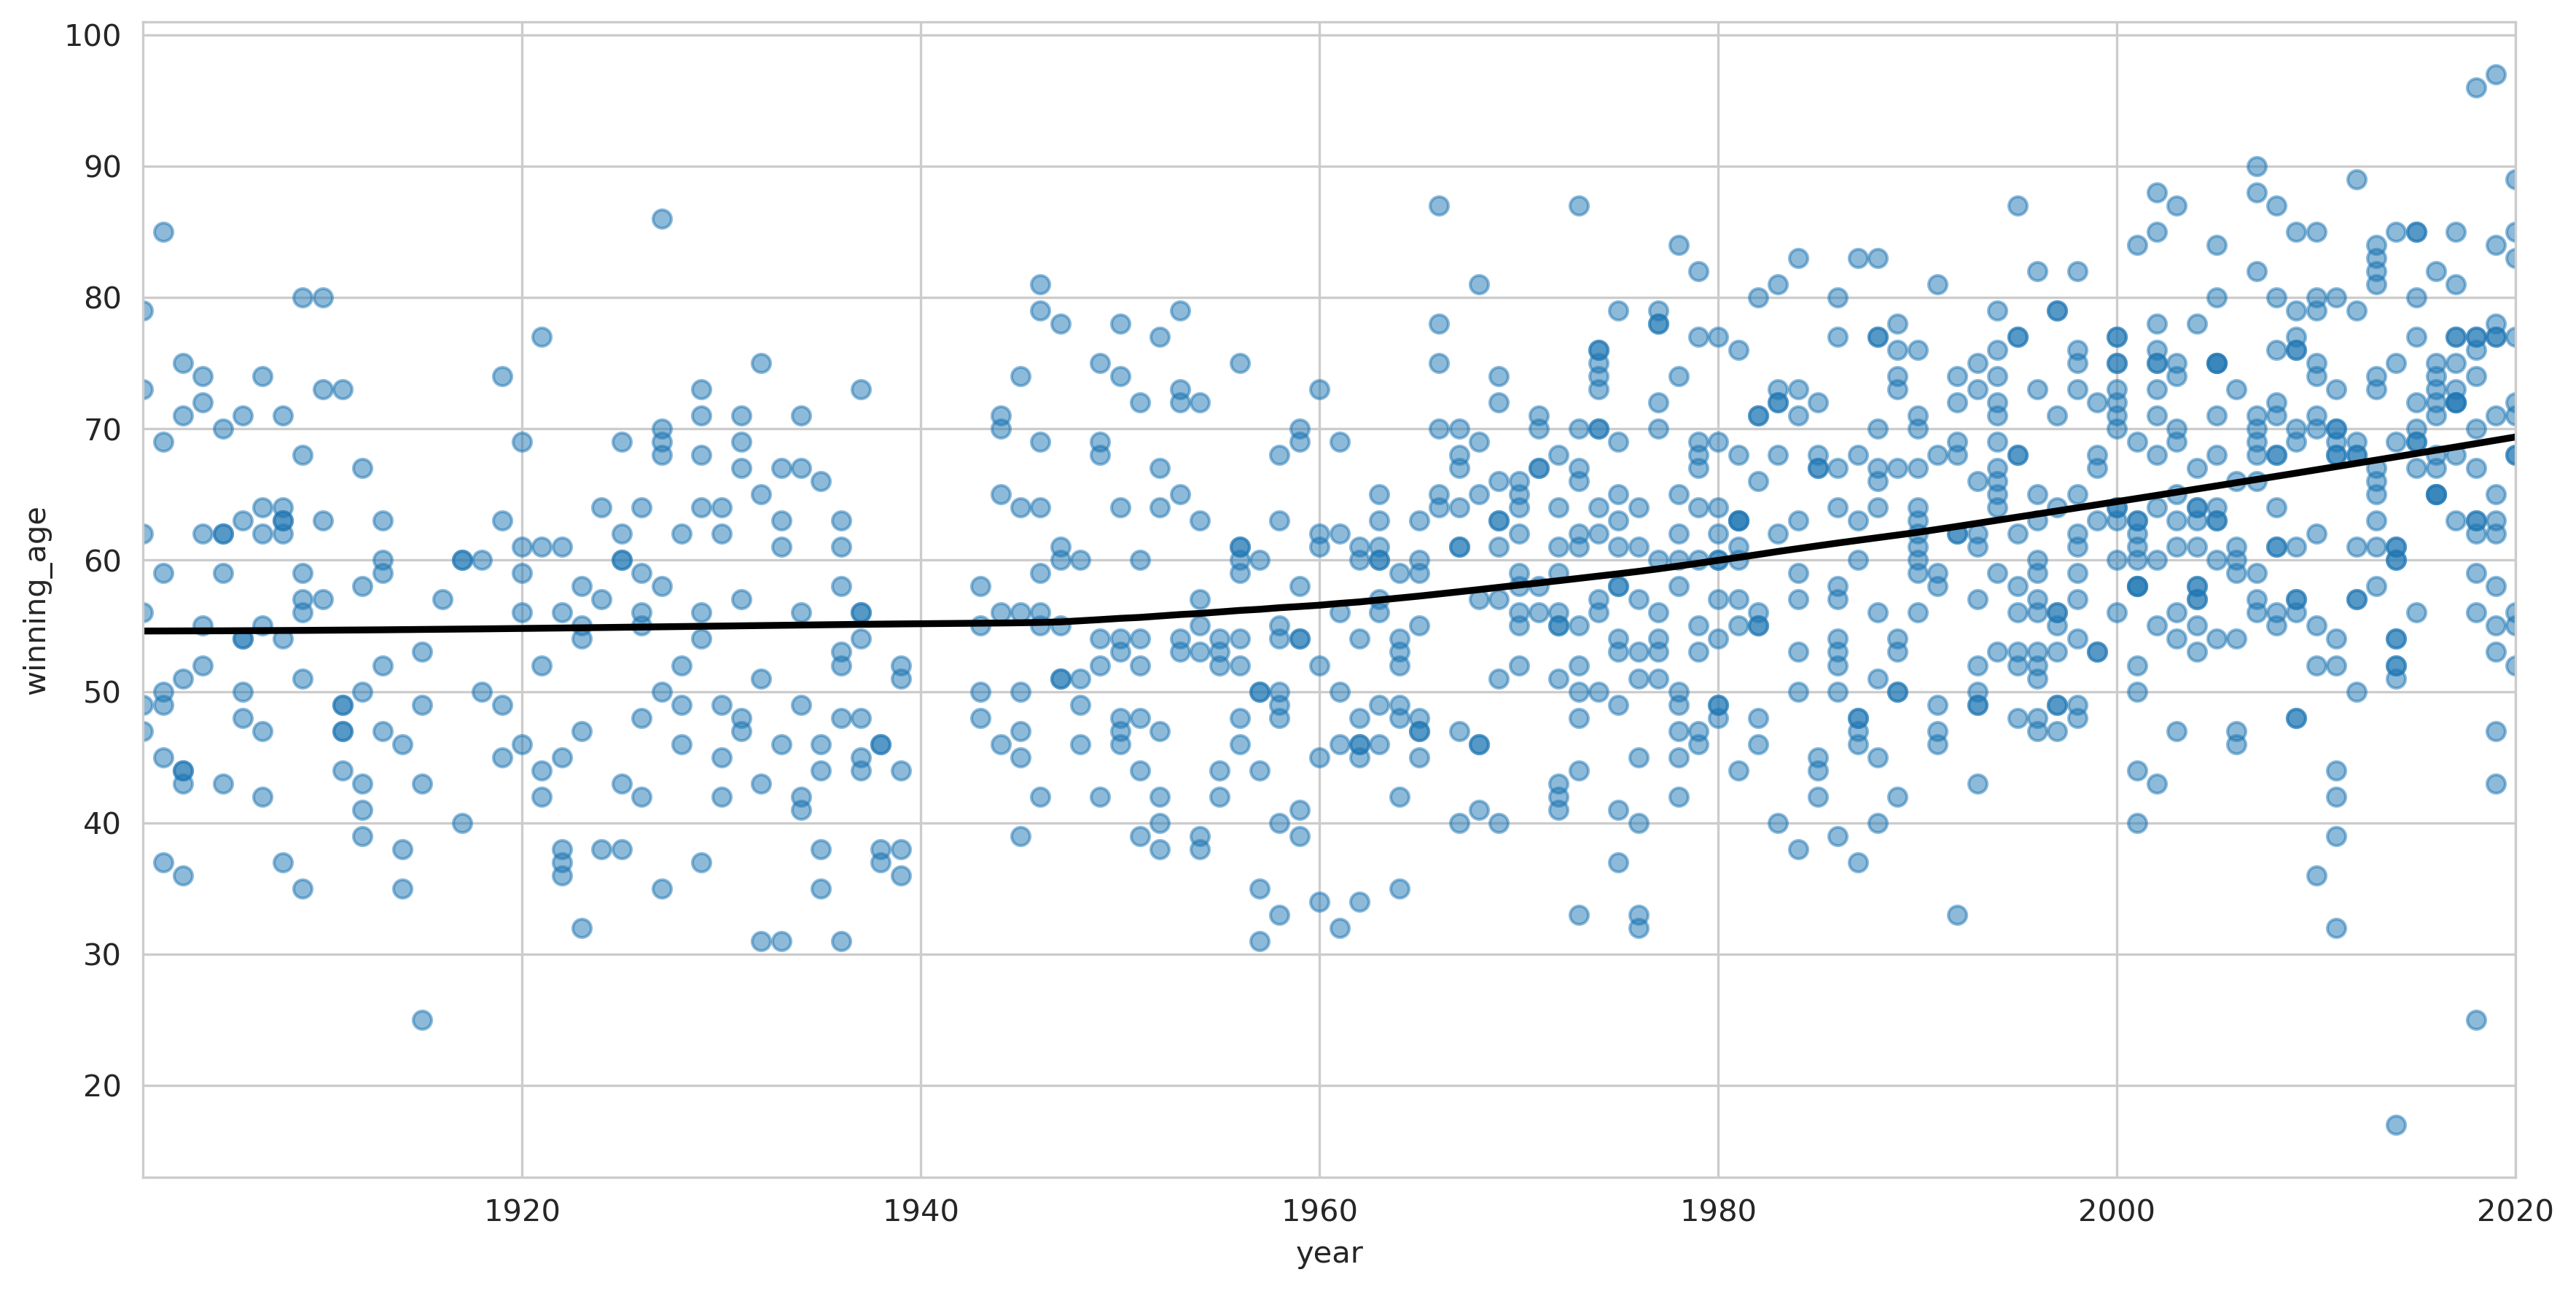

In [70]:
plt.figure(figsize=(14,7), dpi=300)

with sns.axes_style('whitegrid'):
    sns.regplot(x=df_data.year,
                y=df_data.winning_age,
                lowess=True,
                scatter_kws={'alpha':0.5},
                line_kws={'color':'black'}

               )
plt.show()

### Winning Age Across the Nobel Prize Categories


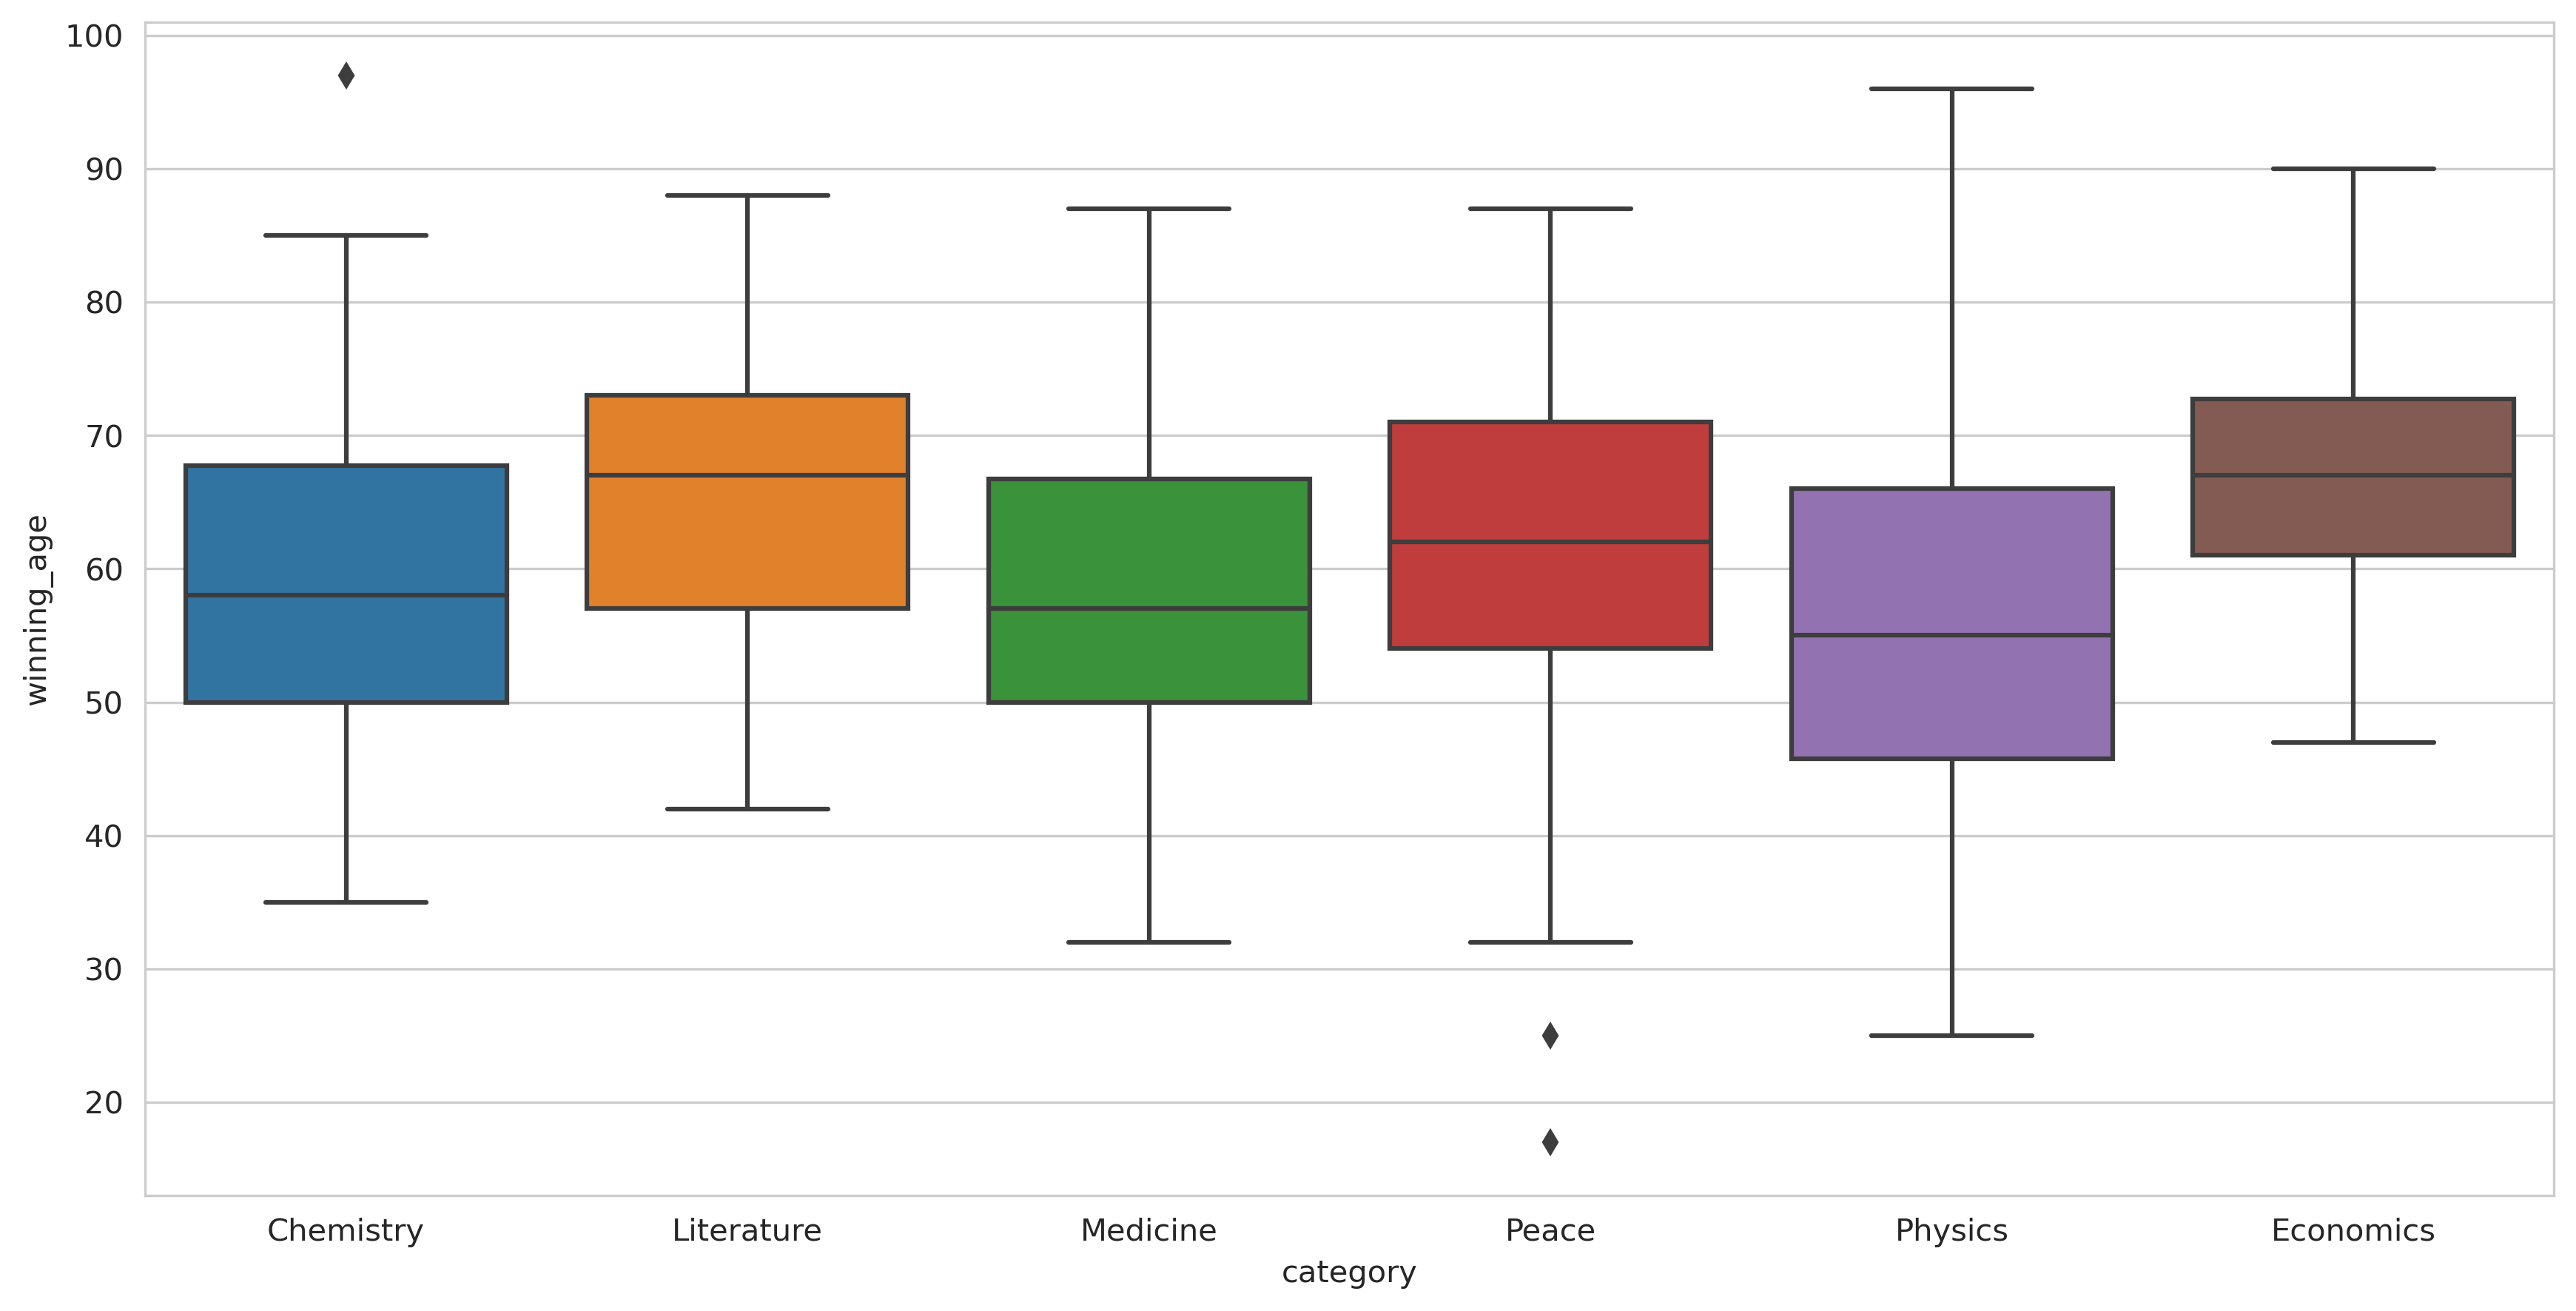

In [71]:
plt.figure(figsize=(14,7), dpi =300)

with sns.axes_style('whitegrid'):
    sns.boxplot(data=df_data,
                y='winning_age',
                x='category'
               )
plt.show()

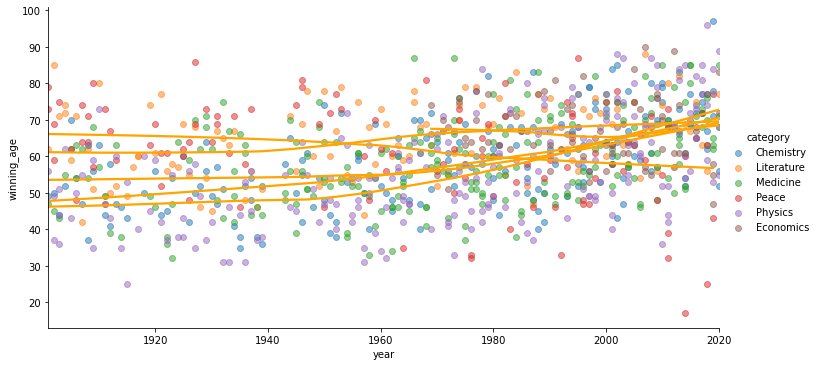

In [72]:
sns.lmplot(data=df_data,
           x='year',
           y='winning_age',
           hue='category',
           lowess=True,
           scatter_kws={'alpha':0.5},
           line_kws={'color':'orange'},
           aspect=2
        
          )
plt.show()

#  ROW FOR INDIVIDUAL GRAPH

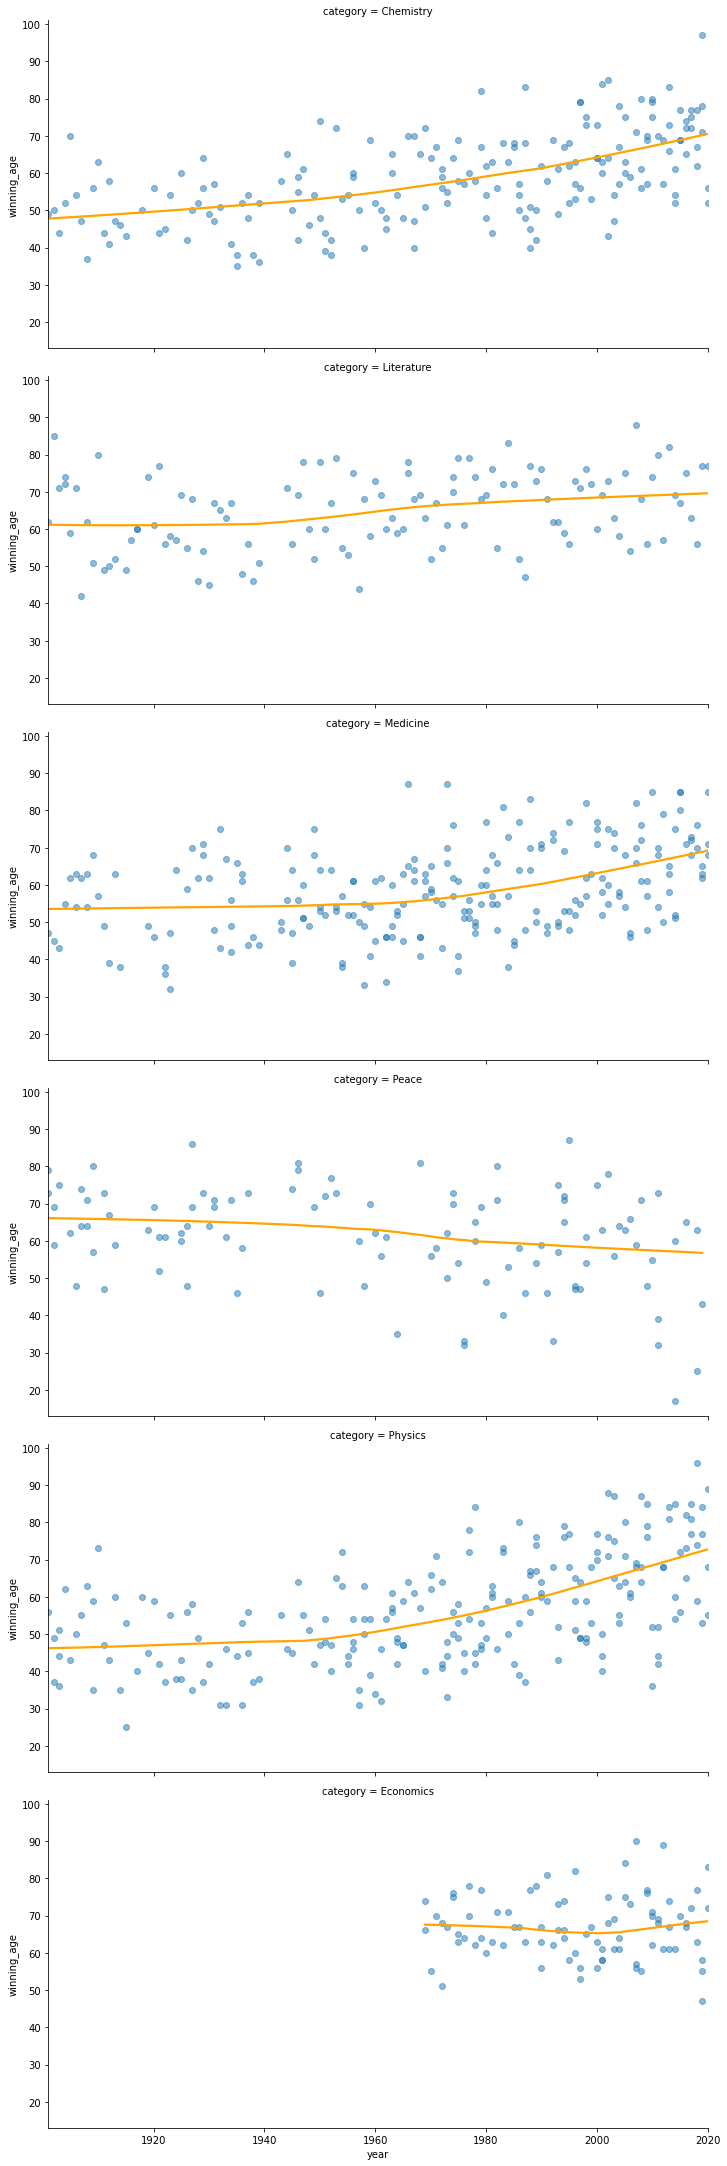

In [73]:
sns.lmplot(data=df_data,
           x='year',
           y='winning_age',
           row='category',
           lowess=True,
           scatter_kws={'alpha':0.5},
           line_kws={'color':'orange'},
           aspect=2
        
          )
plt.show()

# Thank you